In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Load the data

data_path = "./kaggle/train.csv"
data = pd.read_csv(data_path)

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


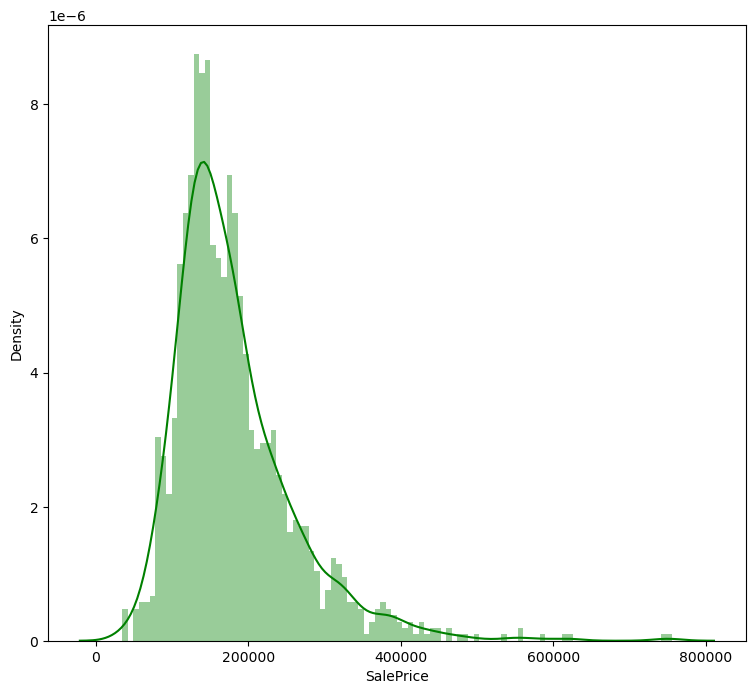

In [3]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [4]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


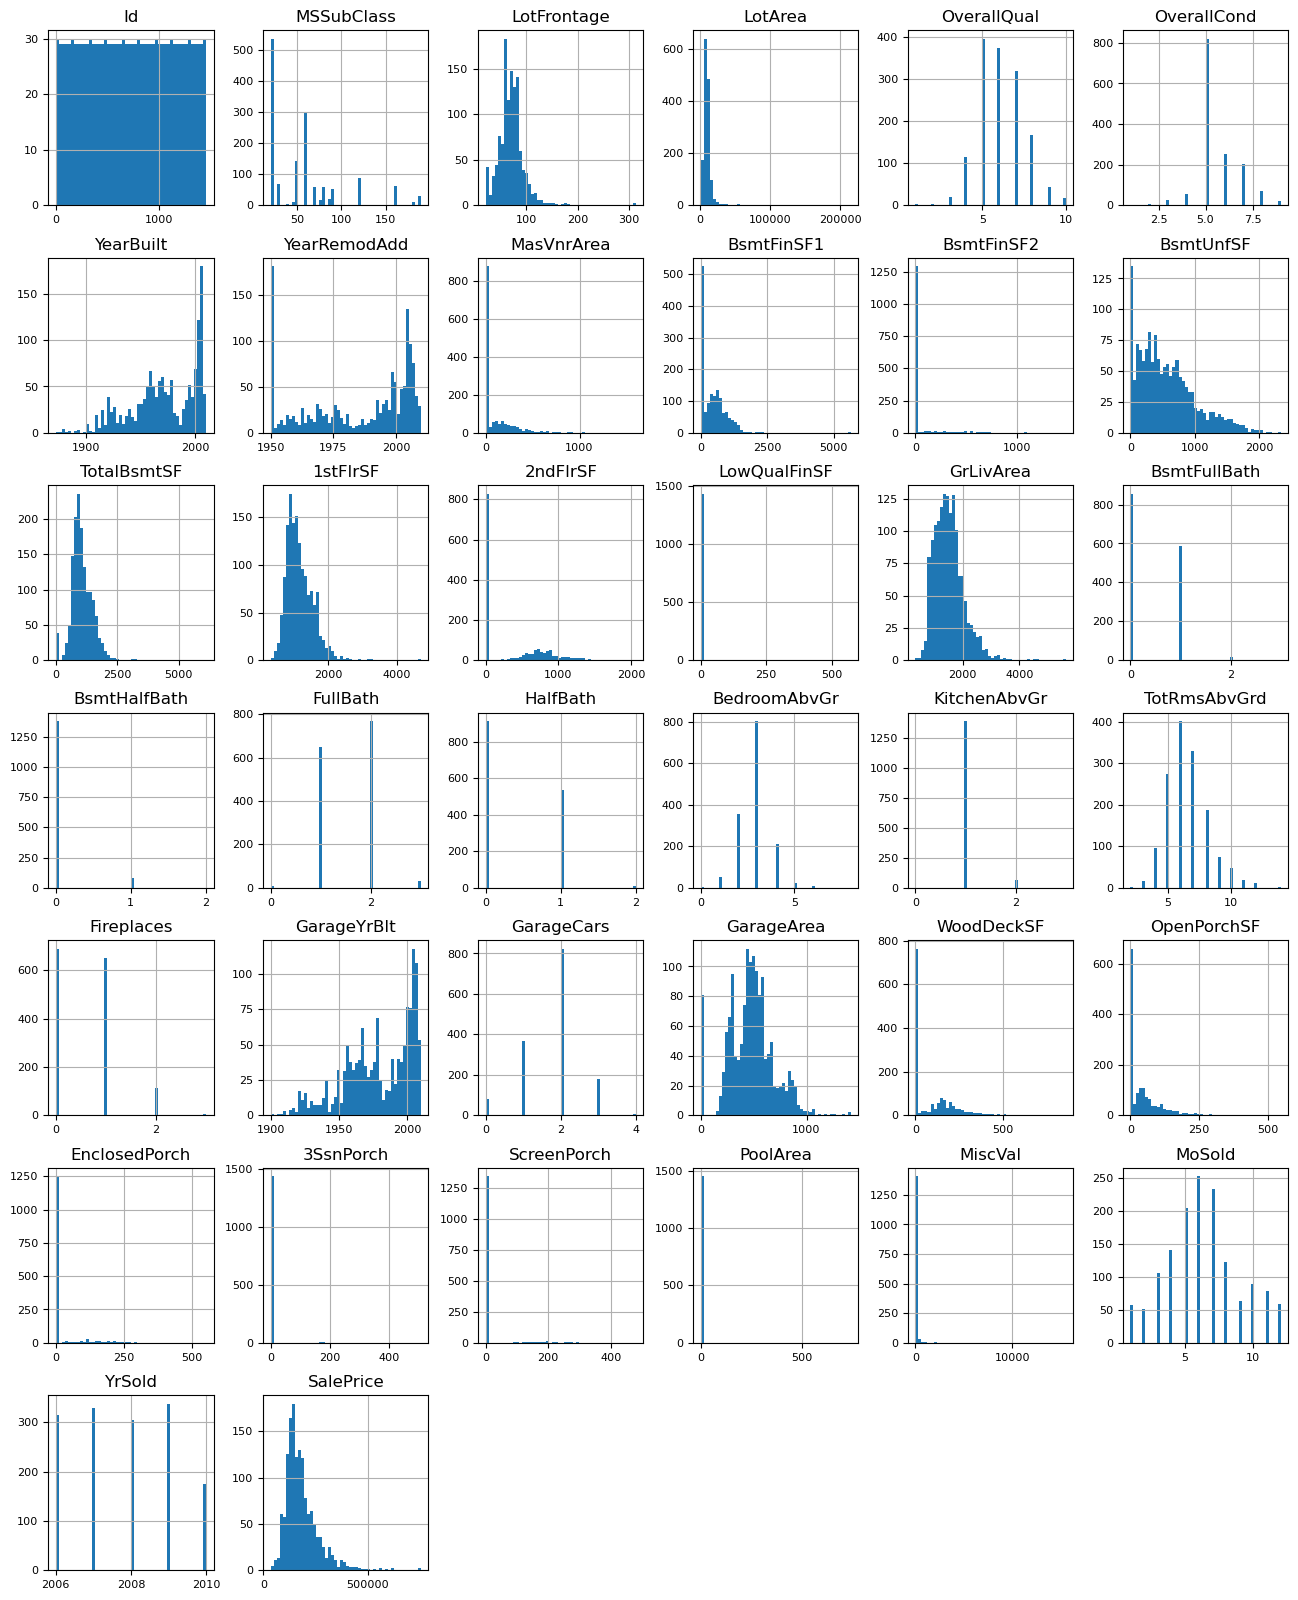

In [5]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Define the helper functions

In [6]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [7]:
# Additional Helper Functions


def show_plot(x_train, y_train, w1, w2, b1, b2):
    # Generate a range of values for w and b to visualize the cost function
    w_values = np.linspace(w1, w2, 100)
    b_values = np.linspace(b1, b2, 100)
    cost_values = np.zeros((len(w_values), len(b_values)))
    
    # Compute cost for each combination of w and b
    for i in range(len(w_values)):
        for j in range(len(b_values)):
            cost_values[i, j] = compute_cost(x_train, y_train, w_values[i], b_values[j])
    
    # 2D visualization (Cost vs w for a fixed b and Cost vs b for a fixed w)
    plt.figure(figsize=(12, 6))
    
    # Plot Cost vs w for a fixed b (e.g., b = 0)
    fixed_b = 0
    cost_vs_w = [compute_cost(x_train, y_train, w, fixed_b) for w in w_values]
    plt.subplot(1, 2, 1)
    plt.plot(w_values, cost_vs_w, label=f"b = {fixed_b}")
    plt.xlabel('w')
    plt.ylabel('Cost')
    plt.title('Cost vs w (for fixed b)')
    plt.grid(True)
    
    # Plot Cost vs b for a fixed w (e.g., w = 200)
    fixed_w = 200
    cost_vs_b = [compute_cost(x_train, y_train, fixed_w, b) for b in b_values]
    plt.subplot(1, 2, 2)
    plt.plot(b_values, cost_vs_b, label=f"w = {fixed_w}", color='orange')
    plt.xlabel('b')
    plt.ylabel('Cost')
    plt.title('Cost vs b (for fixed w)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 3D visualization of Cost(w, b)
    W, B = np.meshgrid(w_values, b_values)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, cost_values.T, cmap='viridis')
    
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Cost')
    ax.set_title('Cost function for varying w and b')
    
    plt.show()

def plot_contour(x_train, y_train, compute_cost, w1, w2, b1, b2):
    # Define ranges for w and b
    w_values = np.linspace(w1, w2, 100)
    b_values = np.linspace(b1, b2, 100)
    
    # Initialize a grid to store cost values
    cost_values = np.zeros((len(w_values), len(b_values)))
    
    # Compute the cost for each combination of w and b
    for i in range(len(w_values)):
        for j in range(len(b_values)):
            cost_values[i, j] = compute_cost(x_train, y_train, w_values[i], b_values[j])

    # Generate contour plot
    W, B = np.meshgrid(w_values, b_values)
    plt.figure(figsize=(10, 8))
    contour = plt.contour(W, B, cost_values.T, levels=50, cmap='viridis')
    plt.colorbar(contour)
    
    # Labeling the plot
    plt.xlabel('w')
    plt.ylabel('b')
    plt.title('Contour plot of Cost function J(w, b)')
    
    plt.show()

In [8]:
# Another data frame would be

data_frame = data[['1stFlrSF', 'SalePrice']].dropna()
data_frame

,1stFlrSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,961,140000
4,1145,250000
...,...,...
1455,953,175000
1456,2073,210000
1457,1188,266500
1458,1078,142125


In [9]:
x_train = np.array(data_frame['1stFlrSF'])
y_train = np.array(data_frame['SalePrice'])

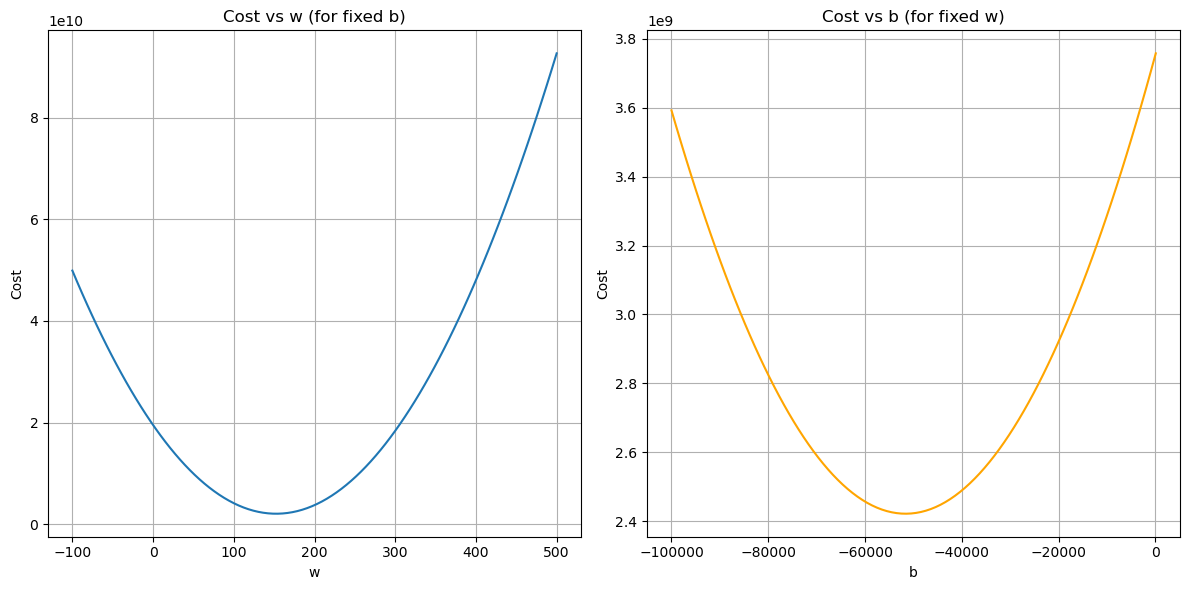

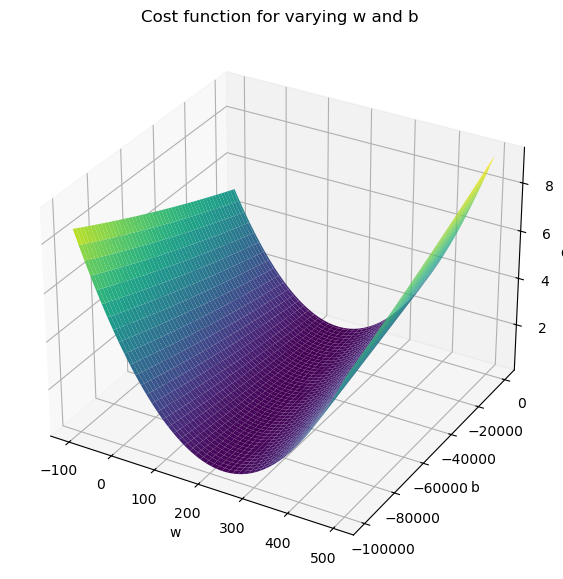

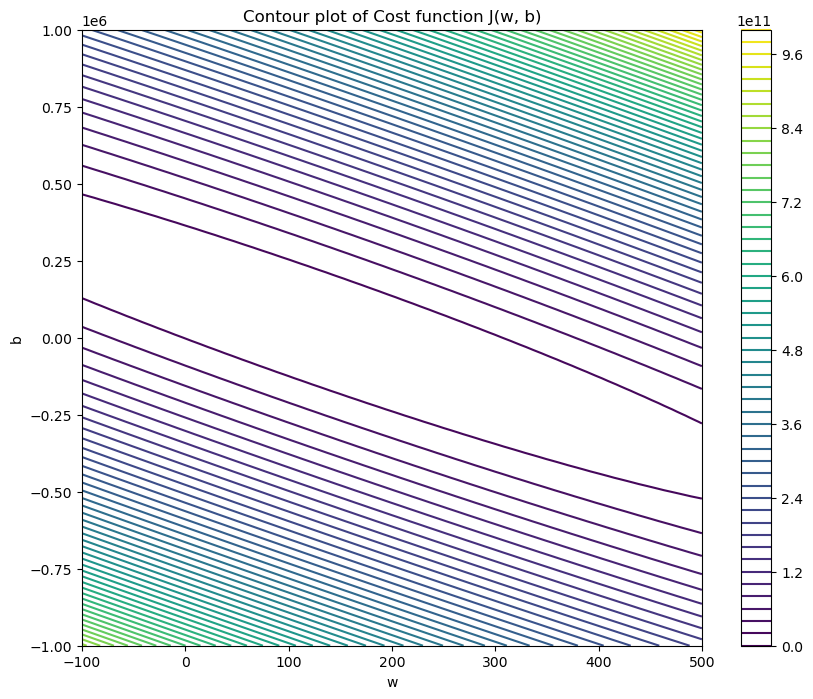

In [10]:
show_plot(x_train, y_train, -100, 500, -100000, 100)
plot_contour(x_train, y_train, compute_cost, -100, 500, -1000000, 1000000)

In [11]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 2000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.93e+18  dj_dw: -2.289e+08, dj_db: -1.809e+05   w:  2.289e+06, b: 1.80921e+03


/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_72755/2309046506.py:9: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb - y[i])**2
/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_72755/2309046506.py:33: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw_i = (f_wb - y[i]) * x[i]
/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_72755/2309046506.py:35: RuntimeWarning: overflow encountered in scalar add
  dj_db += dj_db_i
/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_72755/2309046506.py:75: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - alpha * dj_db
/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_72755/2309046506.py:76: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dj_dw


Iteration 5000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 10000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 15000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 20000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 25000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 30000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 35000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 40000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 45000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
(w,b) found by gradient descent: (     nan,     nan)


In [12]:
# Given training data x_train_2 and y_train_2
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

# Normalize data
x_train_n = (x_train - x_mean) / x_std
y_train_n = (y_train - y_mean) / y_std

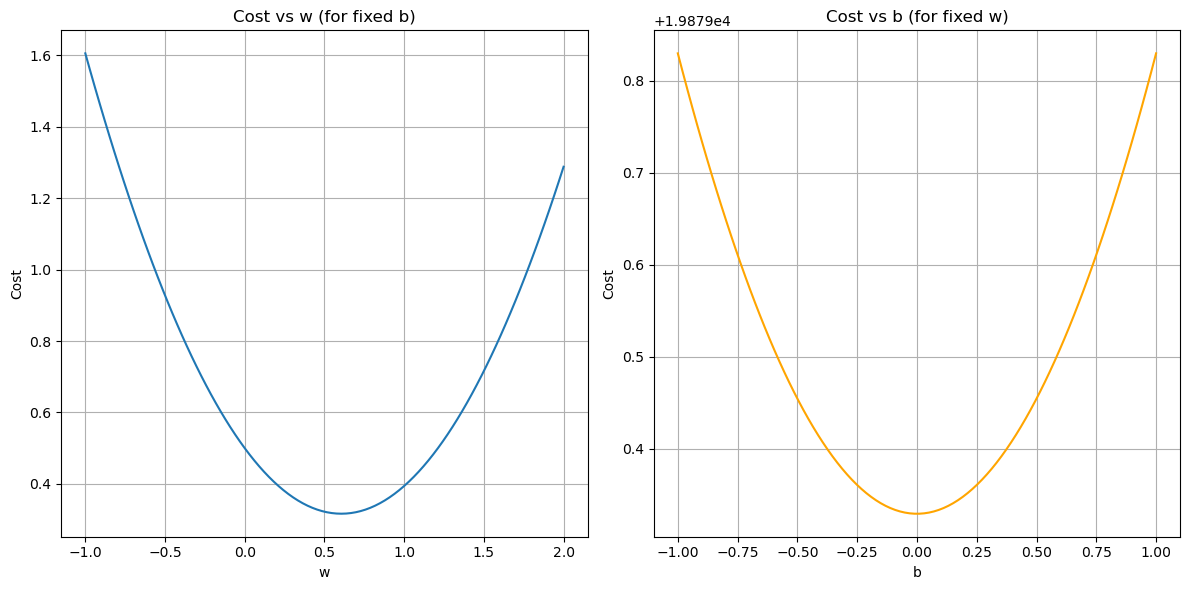

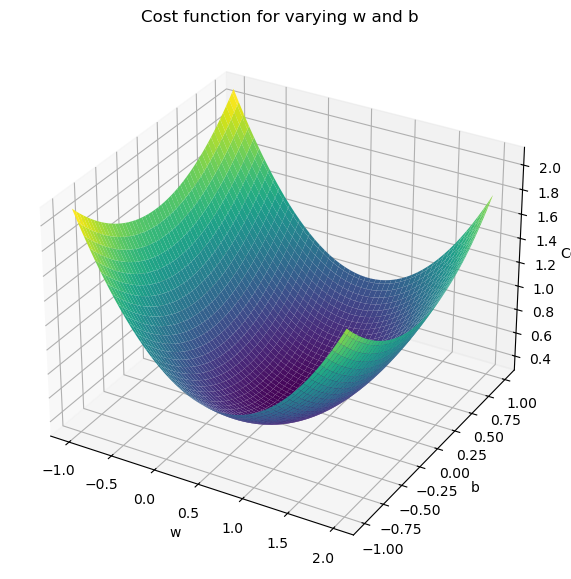

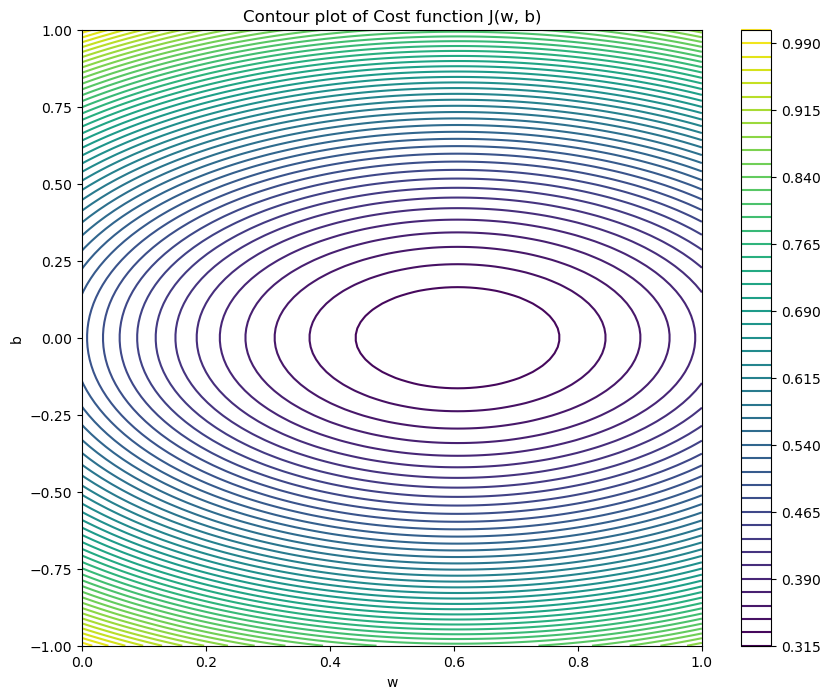

In [13]:
show_plot(x_train_n, y_train_n, -1, 2, -1, 1)
plot_contour(x_train_n, y_train_n, compute_cost, 0, 1, -1, 1)

In [14]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 2000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train_n ,y_train_n, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.96e-01  dj_dw: -6.059e-01, dj_db: -1.180e-16   w:  6.059e-03, b: 1.18018e-18
Iteration  200: Cost 3.20e-01  dj_dw: -8.117e-02, dj_db:  2.296e-17   w:  5.255e-01, b: 8.41621e-17
Iteration  400: Cost 3.17e-01  dj_dw: -1.088e-02, dj_db: -2.281e-19   w:  5.951e-01, b: 8.37796e-17
Iteration  600: Cost 3.16e-01  dj_dw: -1.457e-03, dj_db:  2.943e-17   w:  6.044e-01, b: 8.32755e-17
Iteration  800: Cost 3.16e-01  dj_dw: -1.952e-04, dj_db: -1.452e-17   w:  6.057e-01, b: 8.39180e-17
Iteration 1000: Cost 3.16e-01  dj_dw: -2.616e-05, dj_db:  1.734e-17   w:  6.058e-01, b: 8.40237e-17
Iteration 1200: Cost 3.16e-01  dj_dw: -3.504e-06, dj_db:  3.924e-17   w:  6.058e-01, b: 8.33097e-17
Iteration 1400: Cost 3.16e-01  dj_dw: -4.695e-07, dj_db: -3.042e-19   w:  6.059e-01, b: 8.30831e-17
Iteration 1600: Cost 3.16e-01  dj_dw: -6.290e-08, dj_db: -2.996e-17   w:  6.059e-01, b: 8.33895e-17
Iteration 1800: Cost 3.16e-01  dj_dw: -8.428e-09, dj_db: -4.182e-18   w:  6.059e-01, b: 8.36253e-17


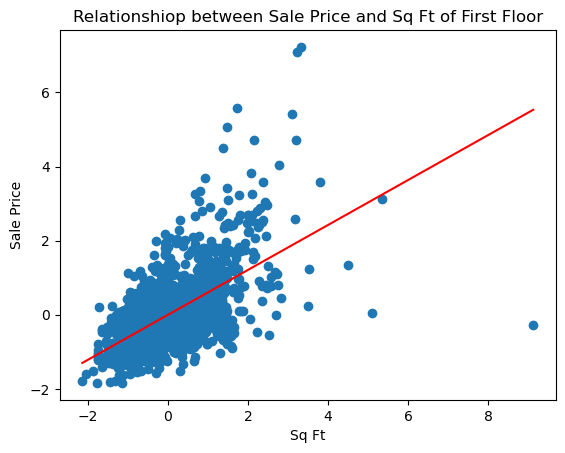

In [16]:
x_values = np.linspace(x_train_n.min(), x_train_n.max(), 500)
y_values = w_final * x_values + b_final
plt.scatter(x_train_n, y_train_n)
plt.plot(x_values, y_values, color='red')
plt.title('Relationshiop between Sale Price and Sq Ft of First Floor')
plt.xlabel('Sq Ft')
plt.ylabel('Sale Price')
plt.show()

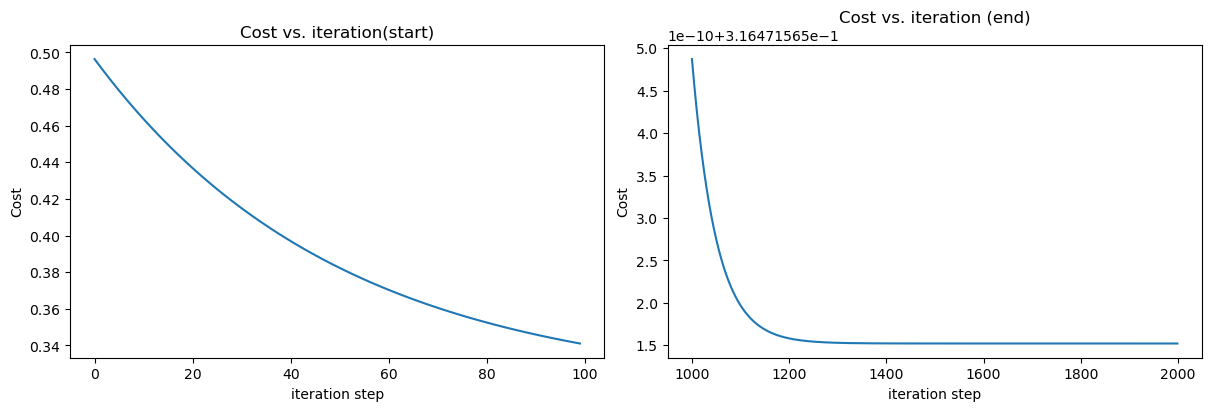

In [17]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## **Question 1**

In our previous work, we determined the values of $w$ and $b$ based on normalized data. However, when making predictions, we need the actual values of $w$ and $b$ that correspond to the original data scale. Our challenge now is to convert the normalized values back to their real counterparts.

How can we address this situation? I encourage you to test your solutions using the `test.csv` file. Successfully converting the values could represent your first valid solution for this Kaggle competition!! (although not a very accurate one since it overlooks the other 77 explanatory variables.)

In our upcoming lectures, we will dive into multiple linear regression, exploring how to incorporate all variables to enhance the accuracy of our model!


## **Question 2**

Apply simple linear regression to another variable of your choice.